In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("graduation_rate.csv");
df.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
1,26,1953,some college,42767,3.6,2.7,9
2,28,2115,some high school,46316,4.0,3.3,5
3,33,2110,some high school,52370,4.0,3.5,4
4,30,2168,bachelor's degree,92665,4.0,3.6,4


In [3]:
df.columns = df.columns.str.replace('', '_')
df.columns = ['ACTscore', 'SATscore', 'ParentLvlEducation', 'ParentIncome', 'HSGPA', 'CollegeGPA', 'YearsToGraduate']
df.columns

Index(['ACTscore', 'SATscore', 'ParentLvlEducation', 'ParentIncome', 'HSGPA',
       'CollegeGPA', 'YearsToGraduate'],
      dtype='object')

In [4]:
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['some high school'], 1)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['high school'], 2)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['some college'], 3)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['associate\'s degree'], 4)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['bachelor\'s degree'], 5)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['master\'s degree'], 6)
df['ParentLvlEducation'].unique()

array([6, 3, 1, 5, 4, 2])

In [8]:
x_data = df[['CollegeGPA', 'YearsToGraduate']];
y_data = df['ParentIncome'];

from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression
LRModel1 = LinearRegression()
LRModel1.fit(x_train1, y_train1)
pd.DataFrame(LRModel1.coef_, x_data.columns, columns = ['Coeff'])

,Coeff
CollegeGPA,38839.085359
YearsToGraduate,-69.353179


Text(0.5, 1.0, 'Linear Regression Model')

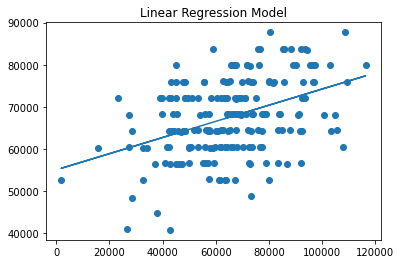

In [10]:
predictions1 = LRModel1.predict(x_test1)
plt.scatter(y_test1, predictions1)
m, b = np.polyfit(y_test1, predictions1, 1)
plt.plot(y_test1, m*y_test1+b)
plt.title("Linear Regression Model")

In [11]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1, predictions1)

14220.486451175948

In [12]:
metrics.mean_squared_error(y_test1, predictions1)

323847752.3796005

In [13]:
np.sqrt(metrics.mean_squared_error(y_test1, predictions1))

17995.77040250293

In [14]:
LRModel1.score(x_test1, y_test1)

0.15348667480492584

In [15]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed 
from matplotlib import pyplot 

data = df[['CollegeGPA', 'YearsToGraduate', 'ParentIncome']]
cor = data.corr()

In [20]:
import math

xz = cor.loc['CollegeGPA', 'YearsToGraduate']
xy = cor.loc['CollegeGPA', 'ParentIncome']
zy = cor.loc['YearsToGraduate', 'ParentIncome']

Rxyz = math.sqrt((abs(xz**2) + abs(zy**2) - 2*xz*zy*xy) / (1-abs(xy**2)))
R2 = Rxyz**2

n = len(df)
k = 2
R2_adj = 1 - (((1-R2)*(n-1)) / (n-k-1))
R2

0.2192897087193479